In [4]:
import pandas as pd
import numpy as np
from ipywidgets import interact,IntSlider
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
data_train=r"C:\Users\josef\Downloads\DATASETS\Train_data.csv"
df_train=pd.read_csv(data_train)

In [6]:
dummy=pd.get_dummies(data=df_train,columns=["protocol_type","service","flag","class"],drop_first=True)
dummy

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class_normal
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
25189,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [7]:
# Asegúrate de importar train_test_split de sklearn.model_selection si no lo has hecho
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
train, test = train_test_split(dummy, test_size=0.3, random_state=42)

# Definir las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = train.drop(columns=['class_normal'])  # Eliminar la variable objetivo 'class' de las características
y_train = train['class_normal']

# Definir las características (X) y la variable objetivo (y) en el conjunto de prueba
X_test = test.drop(columns=['class_normal'])
y_test = test['class_normal']

In [8]:
from sklearn import tree
mymodeltree =tree.DecisionTreeClassifier()
mymodeltree.fit(X_train,y_train)

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'n_estimators'

In [32]:
mymodeltree.score(X_train,y_train)

1.0

In [33]:
y_pred=mymodeltree.predict(X_test)
y_pred

array([False,  True, False, ...,  True, False, False])

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"el modelo tiene una precision de: {accuracy*100}%")

# Mostrar un reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)


el modelo tiene una precision de: 99.61630060862662%
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      3516
        True       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [37]:
cm= confusion_matrix(y_test,y_pred)
cm   #TN FP FN TP

array([[3507,    9],
       [  20, 4022]], dtype=int64)

Text(95.72222222222221, 0.5, 'Verdadero')

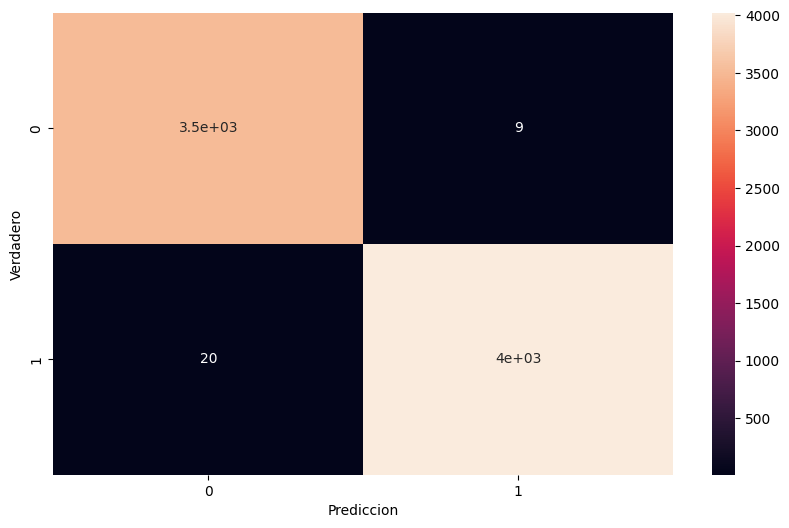

In [40]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')